# Victor Mburu Mwaura

# Key Terms and Definitions

## Artificial Intelligence
Artificial Intelligence (AI) is the simulation of human intelligence in machine allowing them to think and learn like humans using techniques such as machine learning, deep learning, and natural language processing to recognize patterns, make decisions, and solve problems. 

### AI is broadly categorized into three main branches:
- Machine Learning (ML) – This is subset of AI that focuses on building models that can learn from data and make predictions or decisions without being explicitly programmed.
- Natural Language Processing (NLP) – AI that enables machines to understand, interpret, and generate human language (e.g., chatbots, Google Translate).
Computer Vision – AI that enables machines to interpret and process visual data, such as images and videos (e.g., facial recognition, medical imaging).


## Dataset
A dataset is a structured collection of data, organized in a tabular form, where each row represents a record and each column represents a feature or attribute of the data.

## Census / Census tract
A census is systematic collection of data about a population, typically recording various details of individuals at regular intervals. A census tract is a geographic region designed to be relatively uniform in population characteristics, economic status, and living conditions.

## Demographics
Demographics refer to statistical data relating to the characteristics of a population, such as age, gender, income, education, and employment.

## Homogenous areas
Homogenous areas are regions where the population shares similar characteristics, such as socioeconomic status, ethnicity, or housing types which help in clustering and segmentation.

## Dwelling
A dwelling is a place of residence.

## Qualitative info
Qualitative information refers to non-numeric data that describe characteristics, attributes, or experiences, often collected through interviews, surveys, or observations.

## Statistical values
Statistical values are numerical data that infer characteristics of a dataset, such as mean, median, standard deviation, and variance.

## Centroid
A centroid is the geometric center of a cluster in a dataset. This is the average position of all points in a cluster.

## Hierarchical ascending classification
Hierarchical ascending classification is a method of clustering that builds a hierarchy of clusters by iteratively merging the closest pairs of clusters until all points are in a single cluster.

## Dendogram
A dendogram is a tree-like diagram that records the sequences of merges or splits in hierarchical clustering.It helps visualize how clusters are formed and merged at different levels.

## Scatter plot
A scatter plot is a type of data visualization that displays values for typically two variables for a set of data, using Cartesian coordinates to show the relationship between the variables.

## Intelligence analysis
Intelligence analysis is the process of s collecting, processing, and interpreting data to support decision-making. It includes identifying patterns, trends, and threats in large datasets.

## Prior parameters
Prior parameters are initial values or assumptions used in statistical models before observing the data. These parameters help model predictions by incorporating prior knowledge or beliefs before analyzing new data.

## K-means Algorithm
K-means is an unsupervised machine learning algorithm used for clustering. It partitions data into K clusters by assigning each data point to the nearest centroid and updating centroids iteratively until cluster assignments stabilize. 

## Data wrangling
Data wrangling is the process of cleaning, transforming, and organizing raw data into a format suitable for analysis, often involving tasks such as handling missing values, normalizing data, and merging datasets.

# Install & Import the needed libraries for the model

- pandas (pd): Used for data manipulation and analysis.
- numpy (np): Used for numerical computations.
- matplotlib.pyplot (plt): Used for plotting and visualization.
- seaborn (sns): Used for enhanced data visualization.
- sklearn.cluster.KMeans: Implements the K-means clustering algorithm.
- sklearn.preprocessing.StandardScaler: Scales numerical features to a standard distribution.
- sklearn.impute.SimpleImputer: Handles missing values by filling them with a chosen strategy.
- sklearn.decomposition.PCA: Performs Principal Component Analysis (PCA)  to a lower dimensional space while maintaining the the most critical information.

In [25]:
pip install pandas numpy matplotlib scikit-learn seaborn

Note: you may need to restart the kernel to use updated packages.


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import seaborn as sns

In [27]:
# Load the data
data = pd.read_csv('./housing/housing.csv')

#Examine the data
print(data.head())
print(data.info())
print(data.describe())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0         322         126         8.3252              452600        NEAR BAY  
1        2401        1138         8.3014              358500        NEAR BAY  
2         496         177         7.2574              352100        NEAR BAY  
3         558         219         5.6431              341300        NEAR BAY  
4         565         259         3.8462              342200        NEAR BAY  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639

In [28]:
#  Handle missing values
# Impute missing values in total_bedrooms
imputer = SimpleImputer(strategy='median')
# Select only numeric columns for imputation
numeric_features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 
                   'total_bedrooms', 'population', 'households', 'median_income', 
                   'median_house_value']
data_numeric = data[numeric_features].copy()
# Apply imputation
data_numeric_imputed = pd.DataFrame(
    imputer.fit_transform(data_numeric),
    columns=data_numeric.columns,
    index=data_numeric.index
)

In [29]:
# Feature engineering
# Create additional features that might be useful
data_numeric_imputed['rooms_per_household'] = data_numeric_imputed['total_rooms'] / data_numeric_imputed['households']
data_numeric_imputed['bedrooms_per_room'] = data_numeric_imputed['total_bedrooms'] / data_numeric_imputed['total_rooms']
data_numeric_imputed['population_per_household'] = data_numeric_imputed['population'] / data_numeric_imputed['households']


In [30]:
# Feature scaling
# Scale the features to have mean=0 and variance=1
scaler = StandardScaler()
# Exclude median_house_value from clustering but keep it for analysis
features_for_clustering = [col for col in data_numeric_imputed.columns if col != 'median_house_value']
data_scaled = scaler.fit_transform(data_numeric_imputed[features_for_clustering])

In [31]:
#  Apply K-means algorithm with k=2
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters = kmeans.fit_predict(data_scaled)

# Add cluster labels to the original data
data['cluster'] = clusters

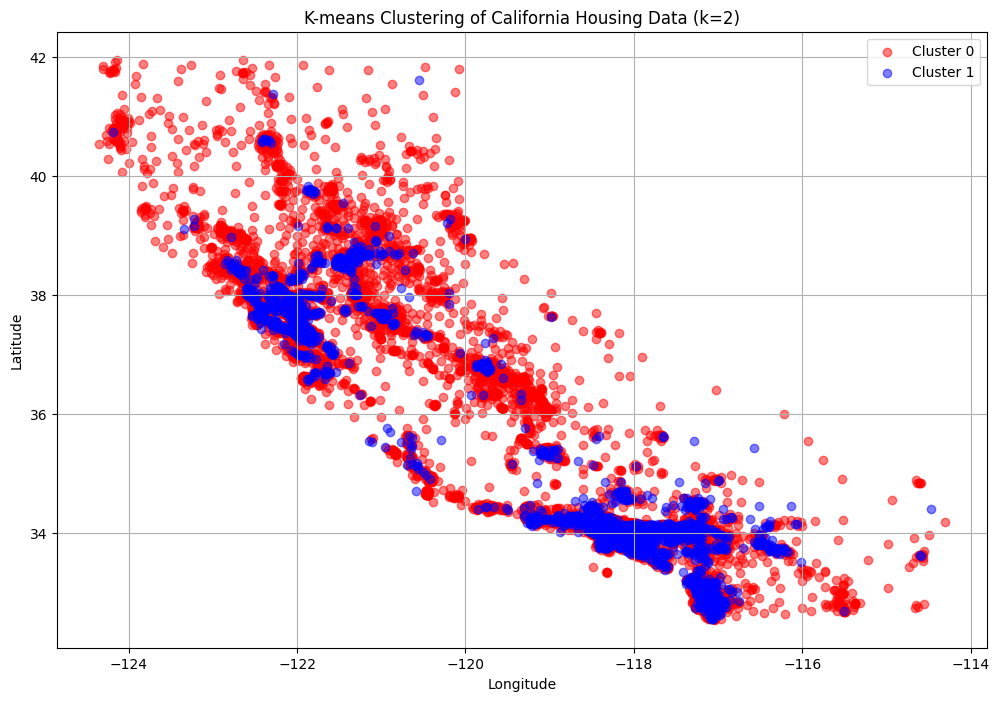

In [32]:
#  Visualize the clusters on a scatter plot of longitude vs latitude
plt.figure(figsize=(12, 8))
plt.scatter(data[data['cluster'] == 0]['longitude'], 
            data[data['cluster'] == 0]['latitude'], 
            c='red', label='Cluster 0', alpha=0.5)
plt.scatter(data[data['cluster'] == 1]['longitude'], 
            data[data['cluster'] == 1]['latitude'], 
            c='blue', label='Cluster 1', alpha=0.5)
plt.title('K-means Clustering of California Housing Data (k=2)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)
plt.savefig('kmeans_clusters_map.png')  # Save the figure
plt.show()


Cluster Statistics:
         median_house_value  median_income  housing_median_age
cluster                                                       
0             204953.123725       3.833651           30.098113
1             221275.479219       4.151231           17.585204


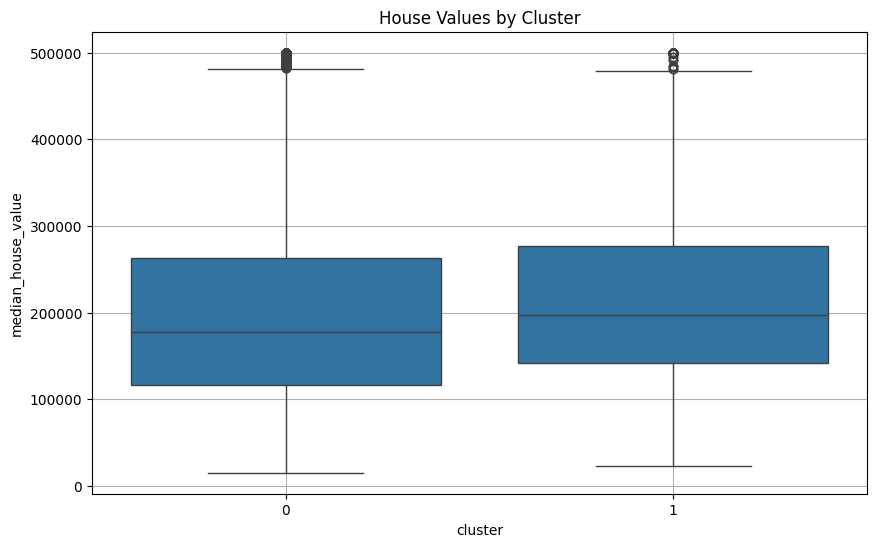

In [ ]:
#  Analyze the clusters
numeric_columns = data.select_dtypes(include=['number']).columns
cluster_stats = data.groupby('cluster')[numeric_columns].mean()
print("Cluster Statistics:")
print(cluster_stats[['median_house_value', 'median_income', 'housing_median_age']])

# Compare house values between clusters
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='median_house_value', data=data)
plt.title('House Values by Cluster')
plt.grid(True)
plt.savefig('house_values_by_cluster.png')  # Save the figure
plt.show()

In [ ]:
# Analyze feature importance for clustering
# Calculate the cluster centers in the original feature space
cluster_centers = pd.DataFrame(
    scaler.inverse_transform(kmeans.cluster_centers_),
    columns=features_for_clustering
)
print("\nCluster Centers (Original Scale):")
print(cluster_centers)

# Evaluate clustering performance
# Calculate silhouette score
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(data_scaled, clusters)
print(f"\nSilhouette Score: {silhouette_avg}")


Cluster Centers (Original Scale):
    longitude   latitude  housing_median_age  total_rooms  total_bedrooms  \
0 -119.619909  35.681411           30.101569  2079.902491      425.692823   
1 -119.191006  35.258108           17.610927  6828.645281     1375.218543   

    population   households  median_income  rooms_per_household  \
0  1147.554159   398.145413       3.833612             5.417053   
1  3521.859685  1264.361341       4.150206             5.519117   

   bedrooms_per_room  population_per_household  
0           0.213800                  3.099994  
1           0.213746                  2.849351  

Silhouette Score: 0.3882863345285948


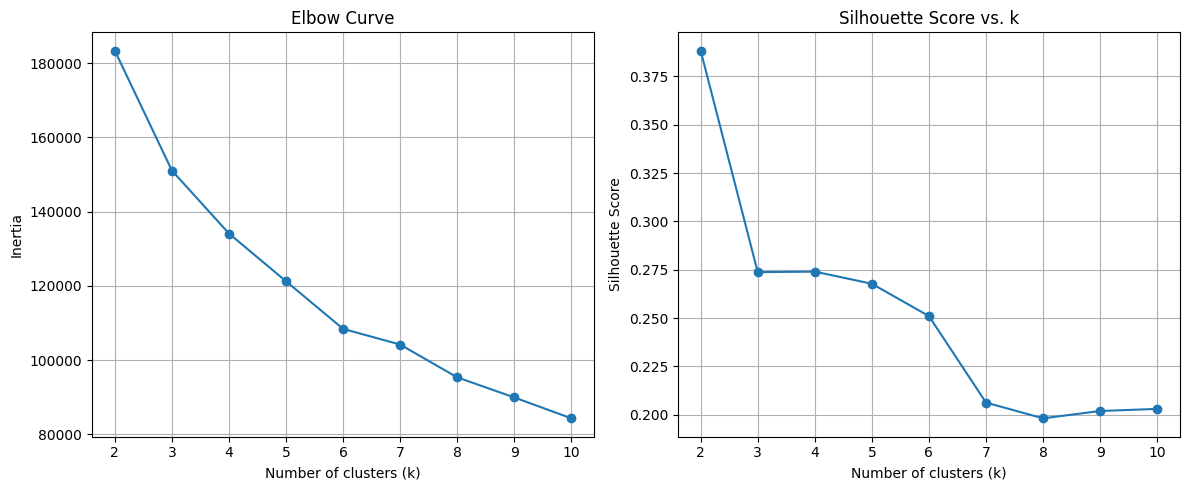

In [37]:
# Try different values of k to find optimal number of clusters
inertia = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans_k = KMeans(n_clusters=k, random_state=42, n_init=10)
    clusters_k = kmeans_k.fit_predict(data_scaled)
    inertia.append(kmeans_k.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, clusters_k))


# Plot elbow curve
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, 'o-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.grid(True)

# Plot silhouette scores
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'o-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. k')
plt.grid(True)
plt.tight_layout()
plt.savefig('kmeans_optimization.png')  # Save the figure
plt.show()